# Q1 a)
$\frac{E_{n}}{E_{1}^{(0)}}$ Plot for:

$\frac{H_{i j}}{E_{1}^{(0)}}=\delta_{i j}\left\{j^{2}+\frac{\pi^{2} \rho^{2}}{48}\left(1-\frac{6}{(\pi j)^{2}}\right)\right\}+\left[1-\delta_{i j}\right]\left\{\frac{\rho^{2}}{2} \frac{(-1)^{i+j}+1}{2}\left(\frac{1}{(i-j)^{2}}-\frac{1}{(i+j)^{2}}\right)\right\}$

Text(0,0.5,'${E_{n}}/{E_{1}^{(0)}}$')

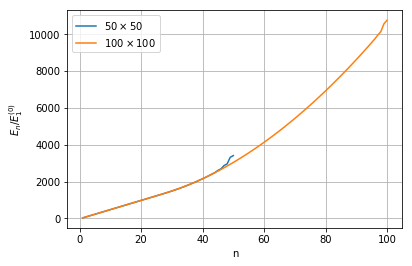

In [49]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def eigenstate(size):
    rho = 50
    v = np.pi**2*rho**2/48   
    delta = np.identity(size)
    
    n = 0
    m = 0
    matrix1 = np.zeros((size, size))
    
    while n < size:    
        while m < size:        
            elem = (m+1)**2+v*(1 - 6/(np.pi*(m+1))**2)        
            matrix1[n, m] = delta[n, m] * elem        
            m = m+1
        m = 0
        n = n + 1
        
    matrix2 = np.zeros((size, size))
    n = 0
    m = 0
    while n < size:    
        while m < size:
    
            if m != n:
                elem = 0.25*rho**2*((-1)**(m+n+2)+1)*(1/(n-m)**2-1/(n+m+2)**2)
            else:
                elem = 0
                   
            matrix2[n, m] = (1-delta[n, m]) * elem        
            m = m+1        
        m = 0
        n = n + 1        
                      
    matrix = matrix1 + matrix2    
    eigenValues, eigenVectors = la.eig(matrix)   
    eigenValues = np.real(eigenValues)
    
    idx = eigenValues.argsort()[::1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]

    index = np.linspace(1, size, size)
    return index, eigenValues, eigenVectors
                  
    
n50, e50, eve50 = eigenstate(50)
plt.plot(n50, e50, label = r'$50 \times 50$')
n100, e100, eve100 = eigenstate(100)
plt.plot(n100, e100, label = r'$100 \times 100$')                     
plt.legend()
plt.grid()
plt.xlabel("n")
plt.ylabel(r'${E_{n}}/{E_{1}^{(0)}}$')


Truncation error shows up around the $n = 50$ for $50 \times 50$ matrixes.

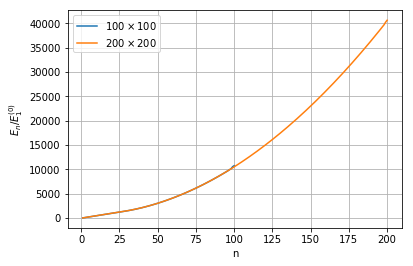

In [50]:
n100, e100, eve100 = eigenstate(100)
plt.plot(n100, e100, label = r'$100 \times 100$')  
n200, e200, eve200 = eigenstate(200)
plt.plot(n200, e200, label = r'$200 \times 200$')
plt.xlabel("n")
plt.ylabel(r'${E_{n}}/{E_{1}^{(0)}}$')
plt.legend()
plt.grid()

Truncation error shows up around the $n = 100$ for $100 \times 100$ matrixes, but relatively smaller.

The energy ratio for harmonic oscillator is $ \frac {h\omega(n-1/2)}{E_1^{(0)}}$. Harmonic oscillator n start from 0 as ground state. 

The energy for infinite square well is $E_n = \frac{n^2\pi^2 \hbar^2}{2ma^2}$, so energy ratio will be $\frac{E_{n}}{E_{1}}= n^2$


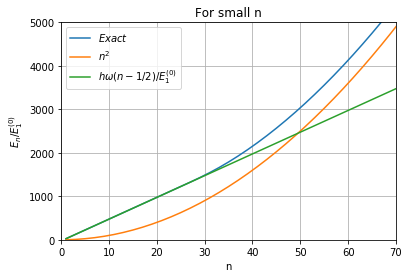

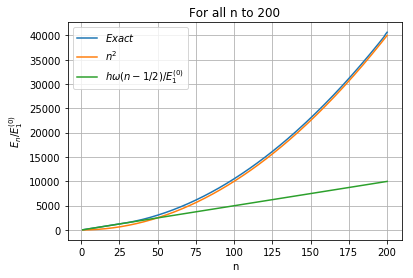

In [52]:
sho = 50*((n200)-1/2) # since n400 start from 1, but harmonic oscillator n start from 0 
inf_sq = n200**2

plt.plot(n200, e200, label = r'$Exact$')
plt.plot(n200, inf_sq, label = r'$n^{2}$' )
plt.plot(n200, sho, label = r'$h\omega(n-1/2)/E_1^{(0)}$')
plt.xlim(0, 70)
plt.ylim(0, 5000)
plt.title('For small n')
plt.xlabel("n")
plt.ylabel(r'${E_{n}}/{E_{1}^{(0)}}$')
plt.legend()
plt.grid()

plt.figure()
plt.plot(n200, e200, label = r'$Exact$')
plt.plot(n200, inf_sq, label = r'$n^{2}$' )
plt.plot(n200, sho, label = r'$h\omega(n-1/2)/E_1^{(0)}$')
plt.xlabel("n")
plt.ylabel(r'${E_{n}}/{E_{1}^{(0)}}$')
plt.title('For all n to 200')
plt.legend()
plt.grid()

# Q1 b) i)

$N_{max} = 10; 20; 50$ plot:

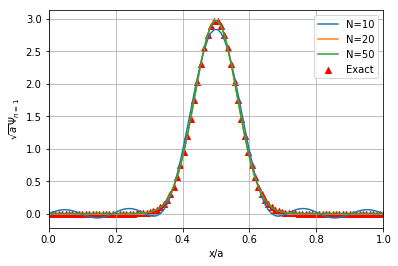

In [79]:
def numerical(eigenV, order):
    x = np.linspace(0, 1, 100)
    n = 1
    psi = 0
    while n < order:
        basis = np.sqrt(2)*np.sin(n*np.pi*x)
        ci = eigenV[n-1]        
        psi = psi+ basis*ci
        n = n+1    
    return x, psi

x_n, psi_10 = numerical(eve50[:, 0], 10)
x_n, psi_20 = numerical(eve50[:, 0], 20)
x_n, psi_50 = numerical(eve50[:, 0], 50)

x = x_n
psi = (np.pi/2*50)**0.25*np.exp(-np.pi**2/4*50*(x-0.5)**2)

plt.figure()
plt.scatter(x, psi, marker='^', c = 'red', label = 'Exact')
plt.plot(x_n, psi_10, label = 'N=10')
plt.plot(x_n, psi_20, label = 'N=20')
plt.plot(x_n, psi_50, label = 'N=50')
plt.xlabel("x/a")
plt.ylabel(r'$\sqrt{a}\Psi_{n=1}$')
plt.xlim(0, 1)
plt.legend()
plt.grid()

# Q1 b) ii) 
First excited state for harmonic oscillator: 
$$\sqrt{a}\psi_{1}(x)=\left( \frac{\pi}{2} \frac{\hbar \omega}{E_{1}^{(0)}}\right)^{3/4}\sqrt{2\pi}  \left(\frac{x}{a}-\frac{1}{2}\right) e^{-\frac{\pi^{2}}{4} \frac{\hbar \omega}{E_{1}^{(0)}}\left(\frac{x}{a}-\frac{1}{2}\right)^{2}}$$

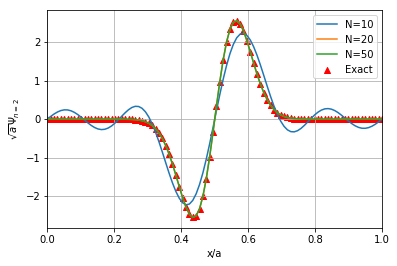

In [80]:
psi2 = (np.pi/2*50)**0.75*np.sqrt(2*np.pi)*(x-1/2)*np.exp(-np.pi**2/4*50*(x-0.5)**2)
plt.scatter(x, psi2, marker='^', c = 'red', label = 'Exact')

x_n, psi2_10 = numerical(-eve50[:, 1], 10)
x_n, psi2_20 = numerical(-eve50[:, 1], 20)
x_n, psi2_50 = numerical(-eve50[:, 1], 50)
#plt.scatter(x, psi, marker='^', c = 'red', label = 'Exact')
plt.plot(x_n, psi2_10, label = 'N=10')
plt.plot(x_n, psi2_20, label = 'N=20')
plt.plot(x_n, psi2_50, label = 'N=50')
plt.xlabel("x/a")
plt.ylabel(r'$\sqrt{a}\Psi_{n=2}$')
plt.xlim(0, 1)
plt.legend()
plt.grid()